In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv = pd.read_csv(r"C:\Users\stanx\Desktop\classification loan\loan_data.csv")
df = pd.DataFrame(csv)

train = df[:33750]
test = df[33750:]

In [3]:
train

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,25.0,male,High School,59110.0,2,RENT,8000.0,MEDICAL,14.99,0.14,4.0,607,Yes,0
33746,30.0,male,Bachelor,216916.0,9,MORTGAGE,20056.0,EDUCATION,11.48,0.09,8.0,707,No,0
33747,31.0,male,Associate,41407.0,8,RENT,5000.0,VENTURE,8.87,0.12,7.0,703,No,0
33748,27.0,male,Bachelor,44369.0,3,MORTGAGE,4000.0,PERSONAL,9.32,0.09,6.0,668,No,0


Text(0, 0.5, 'Number of Loans Given')

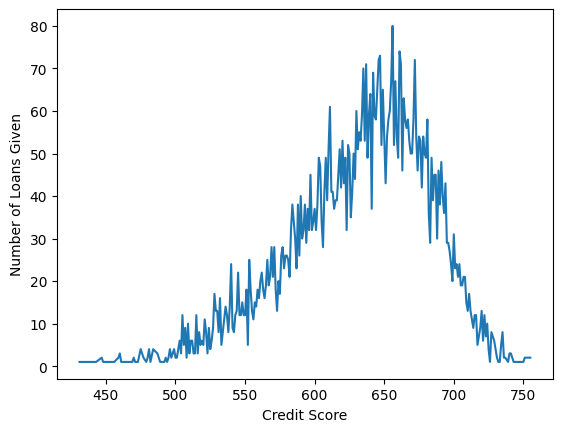

In [85]:
ones = train[train['loan_status'] == 1]
ones

creditCount = ones.groupby('credit_score').size()

plt.plot(creditCount)
plt.xlabel('Credit Score')
plt.ylabel('Number of Loans Given')
    

Text(0, 0.5, 'Number of Loans Given')

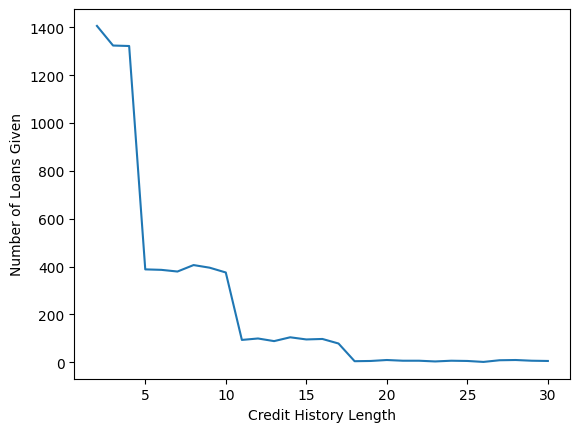

In [87]:
ones = train[train['loan_status'] == 1]
ones

histCount = ones.groupby('cb_person_cred_hist_length').size()
plt.plot(histCount)
plt.xlabel('Credit History Length')
plt.ylabel('Number of Loans Given')




Text(0.5, 0, 'Income')

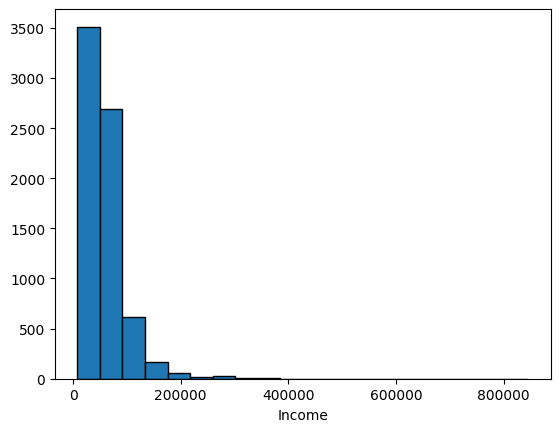

In [130]:
ones = train[train['loan_status'] == 1]
ones

incomeCount = ones.groupby('person_income').size()


expanded_data = incomeCount.index.repeat(incomeCount.values)

plt.hist(expanded_data, bins=20, edgecolor='black')
plt.xlabel('Income')


Text(0, 0.5, 'Number of Loans Given')

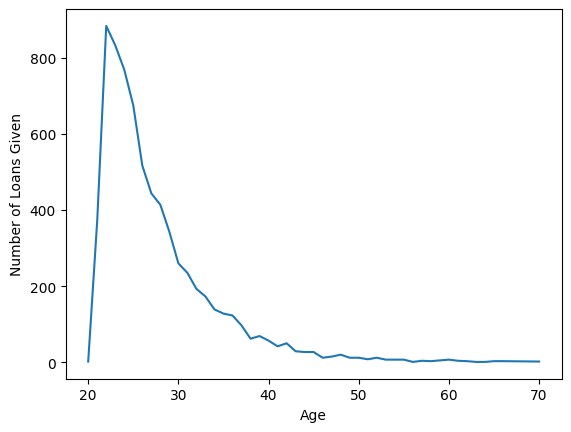

In [129]:
ones = train[train['loan_status'] == 1]
ones

ageCount = ones.groupby('person_age').size()
plt.plot(ageCount)
plt.xlabel('Age')
plt.ylabel('Number of Loans Given')




In [46]:
#training values
neigh = KNeighborsClassifier(n_neighbors = 5)
x = train.loc[:, ('person_age', 'person_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_int_rate', 'loan_percent_income')]
y = train.loc[:, 'loan_status']
neigh.fit(x, y)

#predicitng values in training set
train_pred = neigh.predict(train.loc[:, ('person_age', 'person_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_int_rate', 'loan_percent_income')])

train.loc[:, 'knnClass'] = train_pred

#accuracy of training prediction
train_accuracy = np.sum(np.count_nonzero(train['knnClass'] == train['loan_status'])) / len(train) * 100
train_accuracy

np.float64(84.04444444444444)

In [ ]:

#predicting values in test set
test_pred = neigh.predict(test.loc[:, ('person_age', 'person_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_int_rate', 'loan_percent_income')])
testwpred = test
testwpred.loc[:, 'knnClass'] = test_pred

#test prediction accuracy w/ k=111
test_accuracy = np.sum(np.count_nonzero(testwpred.loc[:, 'knnClass'] == testwpred.loc[:, 'loan_status'])) / len(testwpred) * 100
test_accuracy



np.float64(75.67111111111112)

In [73]:
accurayK = np.array([])

def accuracyTest(k):
    neigh = KNeighborsClassifier(n_neighbors = k)
    x = train.loc[:, ('person_age', 'person_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_int_rate', 'loan_percent_income')]
    y = train.loc[:, 'loan_status']
    neigh.fit(x, y)
    test_pred = neigh.predict(test.loc[:, ('person_age', 'person_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_int_rate', 'loan_percent_income')])

    test.loc[:, 'knnClass'] = test_pred
    test_accuracy = np.sum(np.count_nonzero(test.loc[:, 'knnClass'] == test.loc[:, 'loan_status'])) / len(test) * 100
    return test_accuracy



for i in np.arange(3, 251, 6):
    accurayK = np.append(accurayK, accuracyTest(i))




np.float64(77.38666666666667)

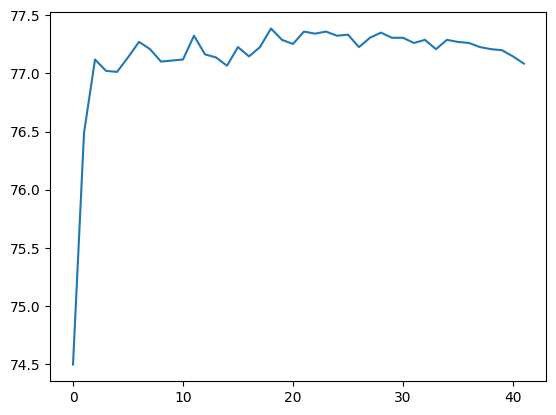

In [ ]:
plt.plot(accurayK)

#fining the most optimal K value to maximize accuracy
maximumAcc = max(accurayK)
maxindex = 0

maxIndex = np.where(accurayK == maximumAcc)
maxIndex



In [76]:
print(accurayK[18])

6*18+3


77.38666666666667


111

In [81]:
#MOST ACCURATE k VALUE for KNN accuracy

accuracyTest(111)

np.float64(77.38666666666667)